In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [3]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [5]:
import requests
import json
url = "https://raw.githubusercontent.com/duhaime/umap-zoo/03819ed0954b524919671a72f61a56032099ba11/data/json/bison.json"
animal = np.array(json.loads(requests.get(url).text)['3d'])
np.shape(animal)

(50000, 3)

(-1.0595327718040621,
 0.9895327718040622,
 -0.49177443340691684,
 0.6626744334069168)

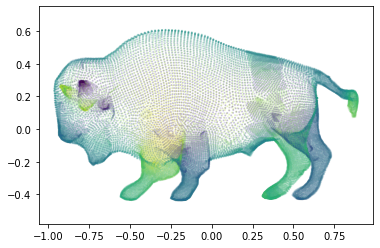

In [6]:
fig, ax = plt.subplots()
ax.scatter(animal[:,2], animal[:,1], s = 1, c = animal[:,0], alpha = 0.1)
ax.axis('equal')

In [7]:
X_train = animal
Y_train = animal[:, 2]
X_train_flat = X_train

### Train model

In [8]:
from umap import UMAP

In [9]:
embedder = UMAP(n_neighbors=150, n_components = 64, verbose=True)
z_umap = embedder.fit_transform(X_train_flat)

UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=64, n_neighbors=150,
     verbose=True)
Construct fuzzy simplicial set
Tue Jul 14 10:12:44 2020 Finding Nearest Neighbors
Tue Jul 14 10:12:44 2020 Building RP forest with 16 trees
Tue Jul 14 10:12:46 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
Tue Jul 14 10:13:43 2020 Finished Nearest Neighbor Search
Tue Jul 14 10:13:57 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jul 14 10:16:00 2020 Finished embedding


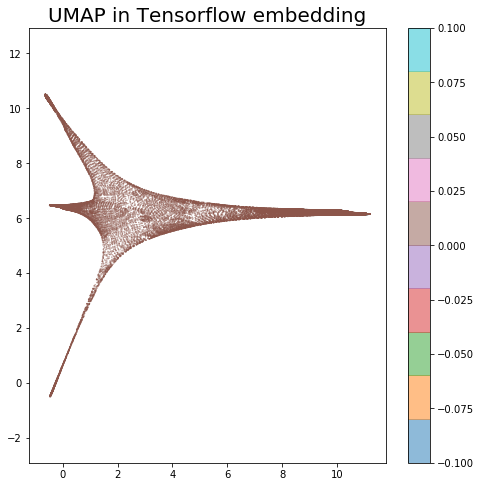

In [10]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z_umap[:, 0],
    z_umap[:, 1],
    c=Y_train.astype(int)[:len(z_umap)],
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save output

In [11]:
import os
import pickle

In [12]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [13]:
output_dir = MODEL_DIR/'projections'/ 'bison'/ '64' / 'umap-learn'
ensure_dir(output_dir)

In [14]:
with open(os.path.join(output_dir, "model.pkl"), "wb") as output:
    pickle.dump(embedder, output, pickle.HIGHEST_PROTOCOL)

In [15]:
np.save(output_dir / 'z.npy', z_umap)